In [70]:
import matplotlib.pyplot as plt
from numpy import exp, pi,log,log10,linspace, array, shape, logspace, loadtxt
from scipy.integrate import quad

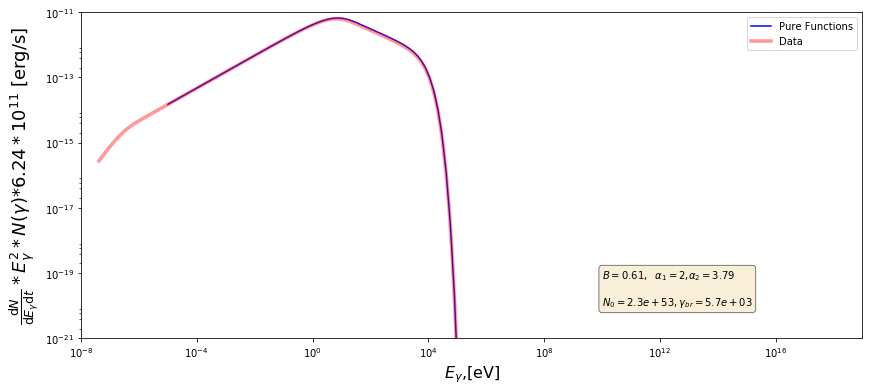

In [71]:
# defining constants
q = 4.8032 * 10**-10  #Electron charge, g**(1/2)*cm**(3/2)*s**-1
h = 6.5821* 10**-16   #Planck constants h bar, Ev*s
m = 9.1095 * 10**-28  #Electron mass, g
c = 2.9979 * 10**10   #Light speed, cm*s-1
mcsquare = 511000     #0.511 MeV electrons rest energy
hev = 4.135667662*10**-15 #Plank's constant in eV
ergtoev = 6.24*10**11 #eV
evtoerg = 0.16*10**-11 #erg
distance = 1.88274 * 10**28 #Distance Earth and object
gamma_min = 1     #Electron min energy
gamma_max = 1.5*10**5   #Electron max energy
delta = 18            #Doppler and Lorenz factor
gamma_br = 5.7*10**3
B = 0.61 #Magnetic flux
N0 = 23*10**52
alpha1 = 2
alpha2 = 3.79
#############################################

#Functions

F = lambda x: 2.15*x**(1/3)*(1+3.06*x)**(1/6)*(1+0.884*x**(2/3)+0.471*x**(4/3))*exp(-x)/(1+1.64*x**(2/3)+0.974*x**(4/3)) #Bessel function
Ec = lambda gamma,B: 3*q*h*B*gamma**2/(2*m*c)  ##Measurment is eV, characteristic energy
Energy = lambda Eg,B,gamma:  3**0.5*q**3*B/(2*pi*mcsquare*h*Eg)*F(Eg/Ec(gamma,B)) #Eg is a photon energy

def ElectronDist(gamma):  ###Electron distribution, broken law
    if gamma<gamma_br:
        return N0*gamma**(-alpha1)
    elif gamma >= gamma_br:
        return N0*gamma_br**(alpha2-alpha1)* gamma**(-alpha2)

EnergySyn_subintegral =  lambda j,Eg,B: 10**j*log(10) * Energy(Eg,B,10**j) *ElectronDist(10**j)   ## 10**j in subtituted \
                                                                                                  #for gamma
EnergySyn = lambda Eg,B: quad( EnergySyn_subintegral, log10(gamma_min), \
                              log10(gamma_max), args=(Eg,B), limit = 50)[0] #Energy of all phpotons combined
Luminosity= lambda Eg,B: Eg**2* EnergySyn(Eg,B) #Luminosity of the object
FluxInOurSystem= lambda Eg,B: delta**4 /(4*pi*distance**2) * \
                    Luminosity(Eg/delta,B) * 1/evtoerg #We convert Flux, by brining it in our system via Lorenz transformations


data_syn_freq, data_syn_Lum = loadtxt("C:/Users/Arman/Desktop/Syn.txt",unpack = True)
data_syn_Eg = data_syn_freq *hev #data_syn_freq is frequency
#ploting 

fig,ax = plt.subplots(nrows=1,ncols=1, figsize =(14,6))
Eg_values = logspace(-5,9,num = 100) #domain of Eg values
FluxInOurSystem_values = array([FluxInOurSystem(i,B) for i in Eg_values]) #converting function to numpy array, for given domain


ax.loglog(Eg_values, FluxInOurSystem_values, c = 'b', label= "Pure Functions") #both x and y axes are log scale
ax.set_xlabel(r"$E_\gamma$," +"[eV]", fontsize = 16)
ax.set_ylabel(r'$\frac{ \mathregular{d}N}{\mathregular{d}E_\gamma \mathregular{d}t}* E_\gamma ^{2} * N(\gamma)$' + r'$*6.24*10^{11}$ [erg/s]', fontsize = 18)
ax.set_xlim(10**-8,10**19)
ax.set_ylim(10**-21,10**-11)
ax.loglog(data_syn_Eg,data_syn_Lum, c = 'red', label="Data", lw = 3.6, alpha = 0.4)
ax.legend(loc = 'best')
#adding text to plot
#text = r"$B = 0.61$, $\alpha_1 = 2.2$, $\alpha_2 = 4.5$"+2*"\n"+ r"$N_0 = 2*10^{52}$, $\gamma_{br} = 6*10^{5}$ "
text = r"$B = {},$  $\alpha_1 = {}$,$\alpha_2 = {}$ ".format(B,alpha1,alpha2) +2*"\n"+  r"$N_0 = {:.1e},$".format(N0)+ r"$\gamma_{{br}} = {:.1e}$".format(gamma_br)
bbox_prep = dict(boxstyle= "round", facecolor= "wheat", alpha=0.5) #textbox properties 
ax.text(10**10,10**-20, text, bbox = bbox_prep)

"""
"""

plt.savefig("C:/Users/Arman/Desktop/Synctrotron broken law.pdf")
plt.show()


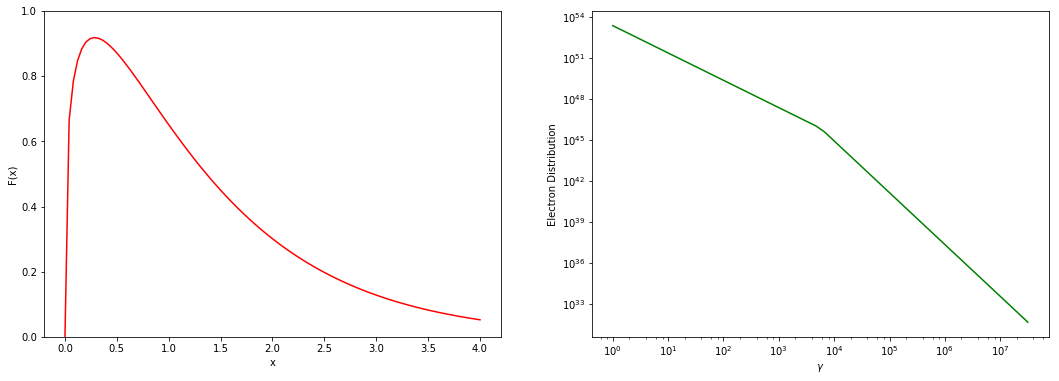

In [72]:
#Testing ploting for other functions
plt.figure(figsize=(18,6))

x_values = linspace(0,4, num=100)
F_values = array([F(i) for i in x_values])
gamma_values = logspace(0,7.5)
ElectronDist_values = array([ElectronDist(i) for i in gamma_values])

plt.subplot(121)
plt.plot(x_values,F_values, c= 'red', label = "F(x)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.ylim(0,1)

plt.subplot(122)
plt.loglog(gamma_values,ElectronDist_values, c = 'g', label = "Electron Distribution")
plt.ylabel("Electron Distribution")
plt.xlabel(r"$\gamma$")


plt.show()